In [134]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn.metrics

In [4]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df=pd.read_csv(url,sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
print ("The rows and columsn in the dataset are:" + str(df.shape))

The rows and columsn in the dataset are:(1599, 12)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

df.rename(columns ={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',
          'residual sugar':'residual_sugar'})
df.head(5)


In [17]:
df.rename(columns={'residual sugar' :'residual_sugar','fixed_acidity':'fixed_acidity','volatile acidity':'volatile_acidity'})

,fixed acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [21]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

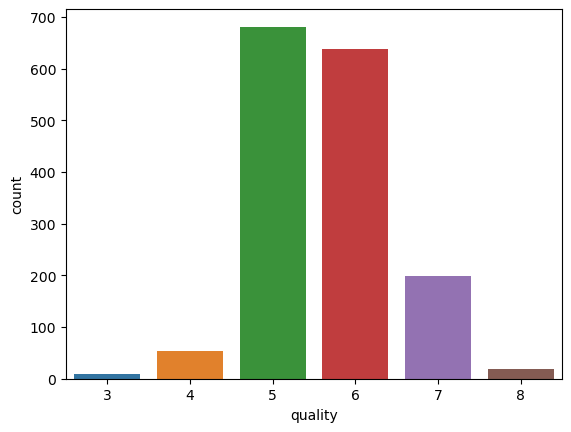

In [25]:
sns.countplot(x='quality',data = df)

In [32]:
conditions =[(df['quality']>=7),
            (df['quality']<4)]
ratings =('good','bad')
df['ratings']=np.select(conditions,ratings,default='average')
df['ratings'].value_counts().sort_index()

average    1372
bad         217
good         10
Name: ratings, dtype: int64

In [33]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ratings
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,bad
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,bad
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


In [36]:
df.groupby('ratings').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
ratings,,,,,,,,,,,,
average,8.235933,0.544563,0.255015,2.511224,0.089039,16.209913,48.456268,0.996855,3.314009,0.645299,10.253195,5.426385
bad,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
good,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.000000


<AxesSubplot:>

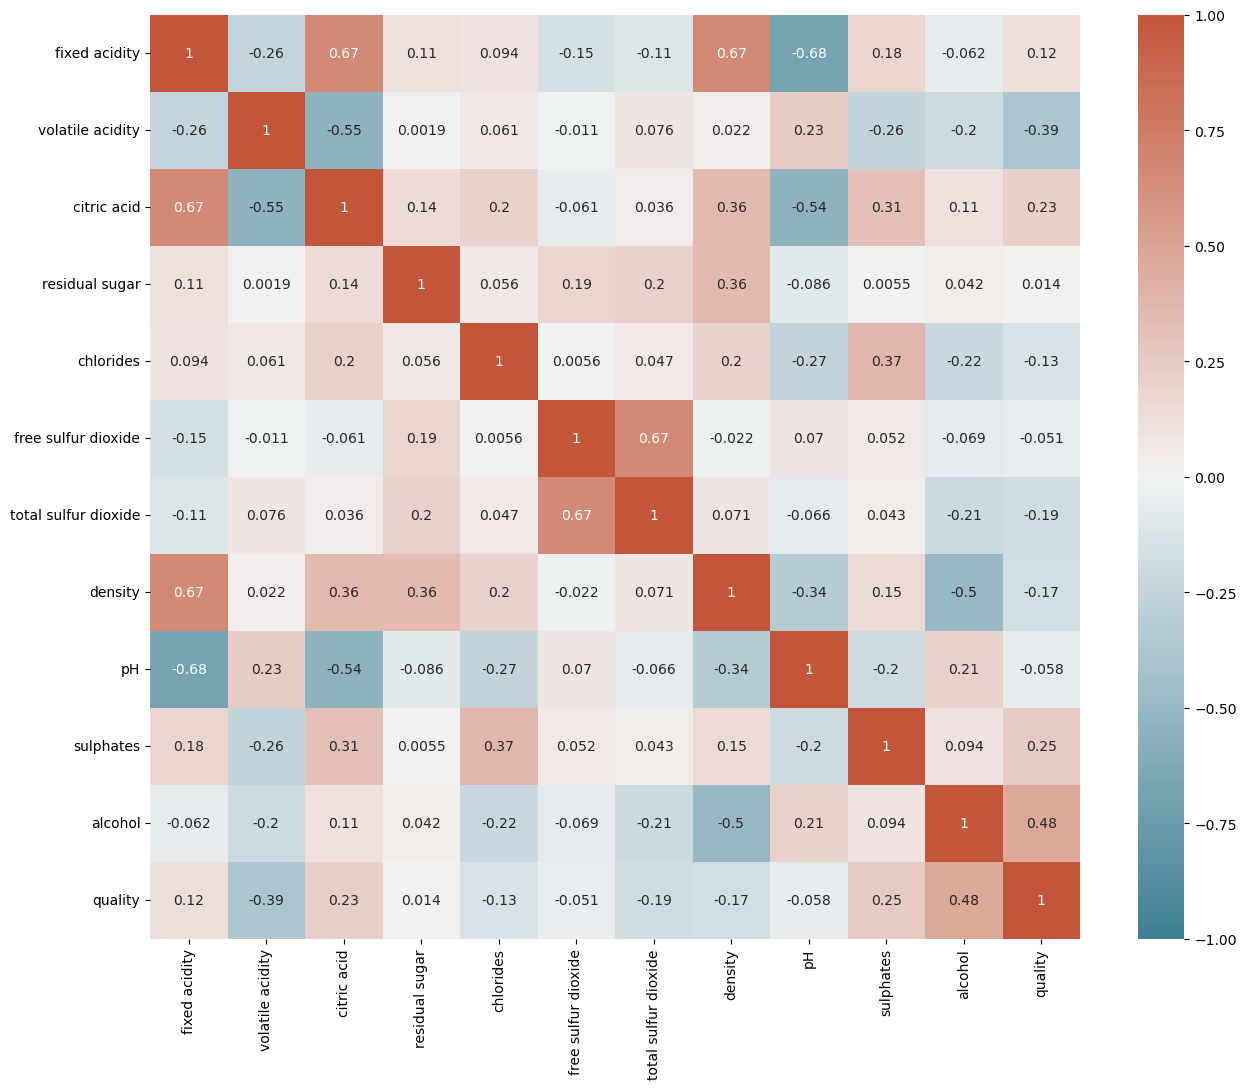

In [40]:
correlation =df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [42]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0, 0.5, 'Alcohol content'),
 Text(0.5, 0, 'Alcohol quality'),
 Text(0.5, 1.0, 'Shwoing the alcohol qaulity in different alc contents')]

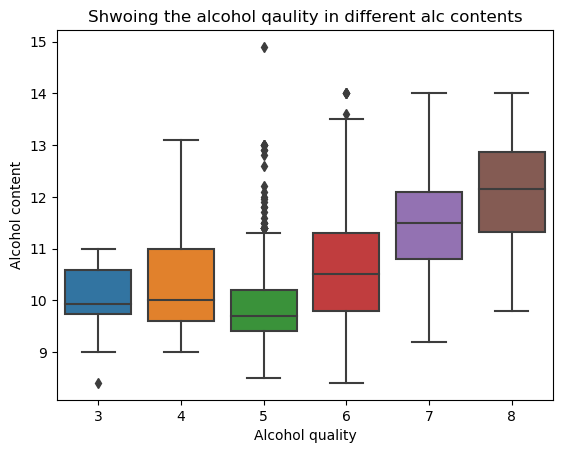

In [45]:
bx=sns.boxplot(x='quality',y='alcohol',data=df)
bx.set(ylabel='Alcohol content',xlabel="Alcohol quality",title="Shwoing the alcohol qaulity in different alc contents")

[Text(0.5, 0, 'Alcohol Ratings'),
 Text(0, 0.5, 'Sulphate Content'),
 Text(0.5, 1.0, 'Checking relation between sulphate and alcohol ratings')]

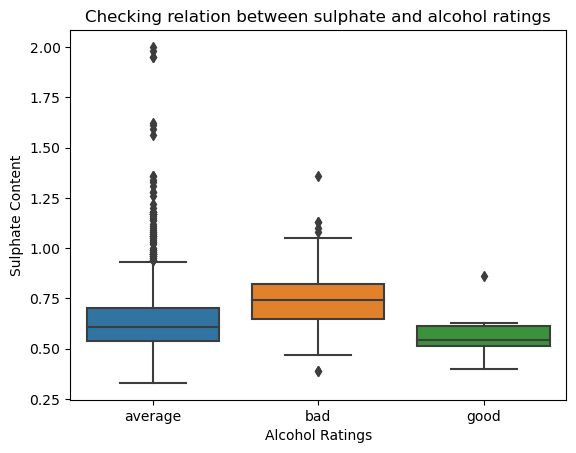

In [47]:
bx=sns.boxplot(x='ratings',y='sulphates',data =df)
bx.set(xlabel='Alcohol Ratings',ylabel='Sulphate Content',title='Checking relation between sulphate and alcohol ratings')

[Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'CitricContent'),
 Text(0.5, 1.0, 'Realtion between citric and alcohol rating')]

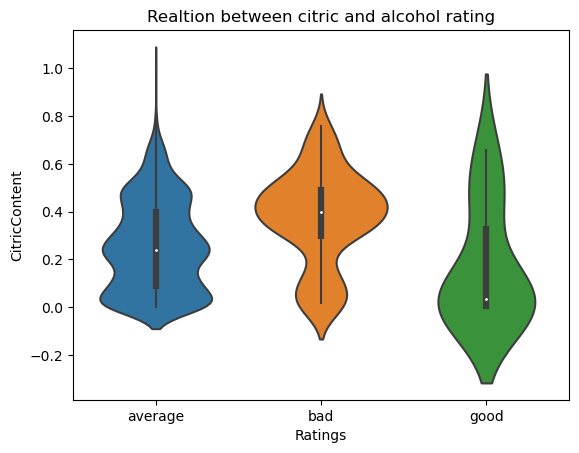

In [50]:
bx=sns.violinplot(x='ratings',y='citric acid',data=df)
bx.set(xlabel='Ratings',ylabel='CitricContent',title='Realtion between citric and alcohol rating')

[Text(0.5, 0, 'Alcoholrating'),
 Text(0, 0.5, 'ResidualSugarContent'),
 Text(0.5, 1.0, 'Correlation between Ratings and Ctric content')]

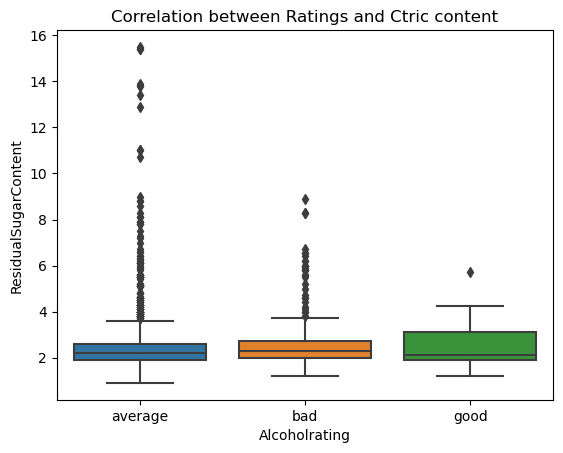

In [53]:
bx=sns.boxplot(x='ratings',y='residual sugar',data=df)
bx.set(xlabel='Alcoholrating',ylabel='ResidualSugarContent',title='Correlation between Ratings and Ctric content')

/Users/swatisuman/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'AlcoholRating'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'Correlation between Ratings and pH')]

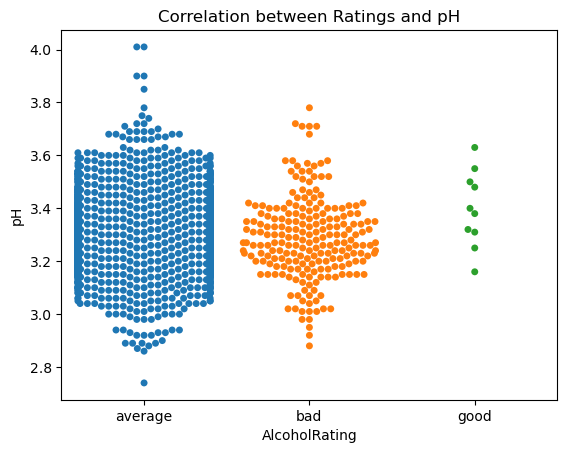

In [54]:
bx=sns.swarmplot(x='ratings',y='pH',data=df)
bx.set(xlabel='AlcoholRating',ylabel='pH',title='Correlation between Ratings and pH')

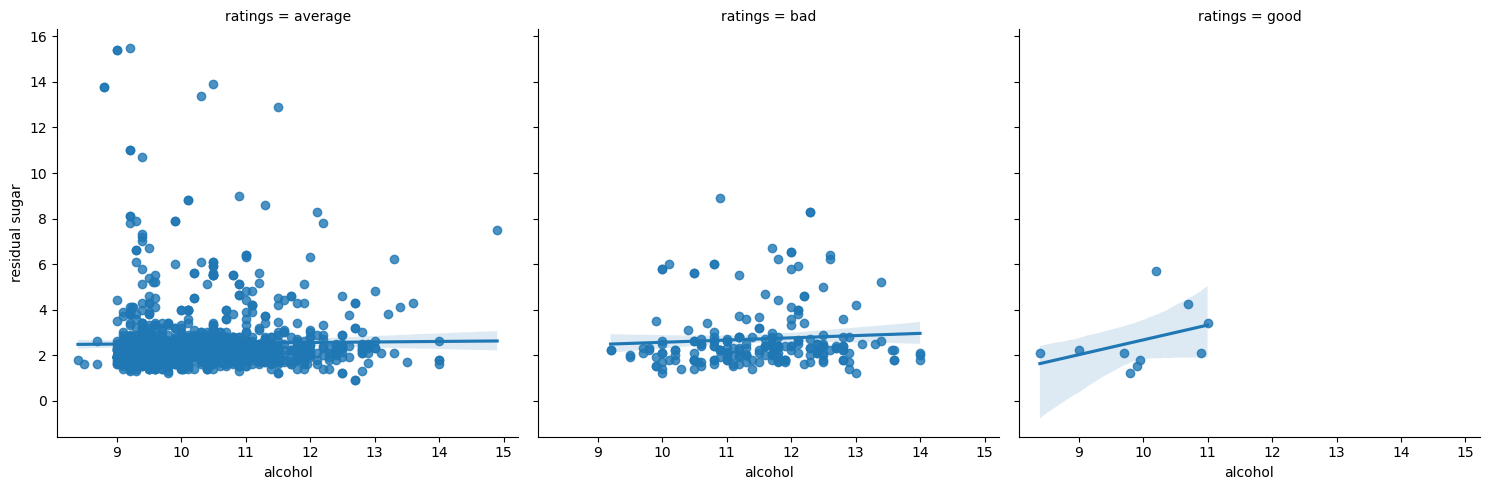

In [56]:
sns.lmplot(data=df,x='alcohol',y='residual sugar',col='ratings')

In [18]:
df['rate_code'] = [1 if x>4  else 0 for x in df['quality']]

<AxesSubplot:ylabel='Density'>

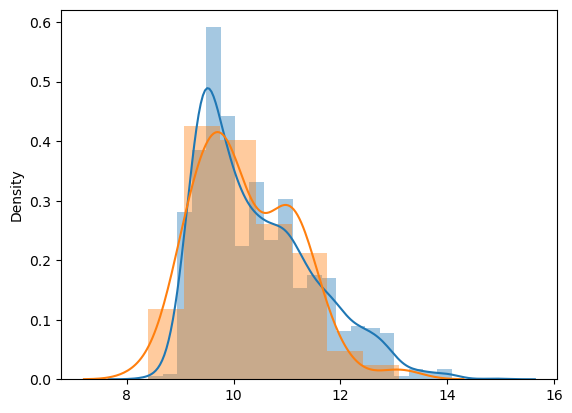

In [20]:
y,X = dmatrices('rate_code ~ alcohol',data =df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

In [56]:
result = smf.logit("rate_code ~ alcohol",data =df).fit()

result.summary2()




Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2023-02-16 16:16 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

In [73]:
results=smf.ols('quality~alcohol',data=df,return_type='dataframe').fit()

results.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.226    
Dependent Variable: quality          AIC:                3446.1135
Date:               2023-02-16 16:24 BIC:                3456.8678
No. Observations:   1599             Log-Likelihood:     -1721.1  
Df Model:           1                F-statistic:        468.3    
Df Residuals:       1597             Prob (F-statistic): 2.83e-91 
R-squared:          0.227            Scale:              0.50462  
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     1.8750     0.1747   10.7319   0.0000   1.5323   2.2177
alcohol       0.3608     0.0167   21.6395   0.0000   0.3281   0.3935
------------------------------------------------------------------
Omnibus:               38.501       Durbin-Watson:          1.748 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       71.758
Skew:                  -0.154       Prob(JB):               0.000 
Kurtosis:              3.991        Condition No.:          104   
==================================================================

"""

In [78]:
result = smf.logit("rate_code ~ alcohol",data =df).fit()

result.summary2()


Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2023-02-16 16:42 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

<AxesSubplot:ylabel='Density'>

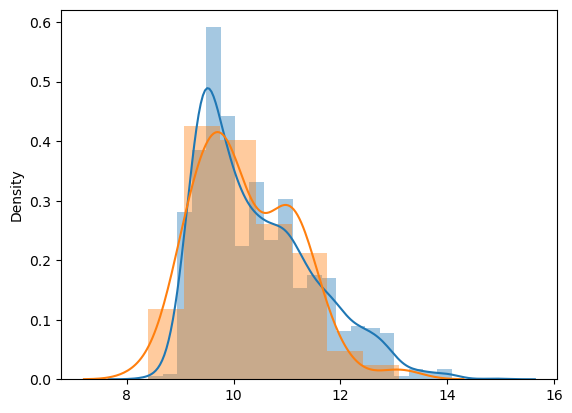

In [80]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

In [88]:

df['rate_code'] = (df['quality'] > 4).astype(np.float32)

<AxesSubplot:ylabel='Density'>

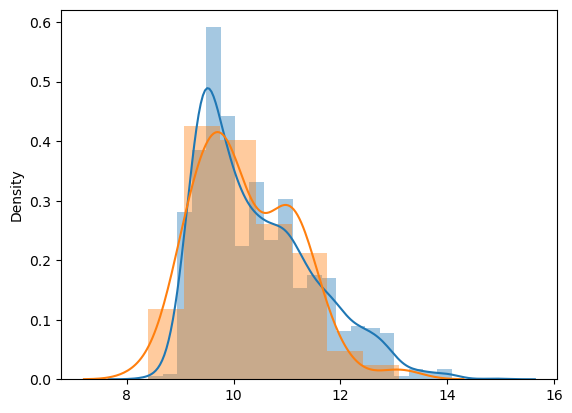

In [89]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

In [91]:
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2023-02-16 16:49 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

<AxesSubplot:ylabel='Density'>

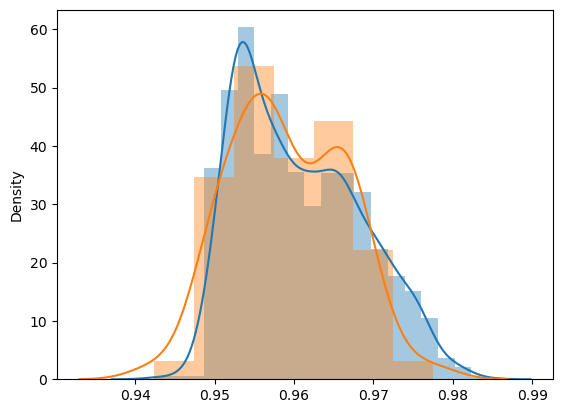

In [94]:
ypred = result.predict(X)
sns.distplot(mod[y[:,0] > 0])
sns.distplot(mod[y[:,0] == 0])

In [97]:
ypred = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, ypred))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98       400

    accuracy                           0.96       400
   macro avg       0.50      0.48      0.49       400
weighted avg       1.00      0.96      0.98       400



In [108]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
design=DecisionTreeClassifier(random_state=1)
design.fit(X,y)
ypred = result.predict(X)>0.955
print(classification_report(y, ypred))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



In [119]:
from sklearn.metrics import classification_report
model = sklearn.linear_model.LogisticRegression()
y,X=dmatrices('rate_code ~ alcohol + sulphates',data = df)
model.fit(X,y)
ypred2=model.predict(X)
print(classification_report(y,ypred2))



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



In [131]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599

